In [1]:
import minisom
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import numpy as np

In [2]:
def generate_data():
    # use random_colours
    raw_data = np.random.randint(0,255,(3,100)) # 100 data with 3 RGB data
    
    data = raw_data / raw_data.max()
    return data

In [3]:
def create_som(width_som, heigth_som, number_features):
    # setup random weights between 0 and 1
    # weight matrix needs to be one m-dimensional vector 
    # for each neuron in the SOM
    net = np.random.random((width_som, heigth_som, number_features)) # 3 dimension matrix
    return net

In [4]:
def find_bmu(t, net, m):
    """
    Find the best matching unit for a given vector, t, in the SOM
    Returns: a(bmu, bmu_idx) tuple where bmu is the high-dimensional BMU
    and bmu_idx is the index of this vector in the SOM
    """
    
    bmu_idx = np.array([0, 0])
    # set the initial minimum distance to a huge number 
    min_dist = np.iinfo(np.int).max
    # calculate the high-dimensional distance between each neuron and the input
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x,y,:].reshape(m, 1)
            # don't bother with actual Euclidean distance, to avoid 
            # expensive sqrt operation
            sq_dist = np.sum((w-t) ** 2)
            if sq_dist < min_dist:
                min_dist = sq_dist
                bmu_idx = np.array([x,y])
    # get vector corresponding to bmu_idx
    bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)
    # return the (bmu, bmu_idx) tuple
    return (bmu, bmu_idx)

In [5]:
def decay_radius(initial_radius, i, time_constant):
    return initial_radius * np.exp(-i / time_constant)

In [6]:
def decay_learning_rate(initial_radius, i, time_constant):
    return initial_radius * np.exp(-i / time_constant)

In [7]:
def calculate_influence(distance, radius):
    return np.exp(-distance / (2 * (radius ** 2)))

In [8]:
def train(data, n_iterations, net, init_radius, time_constant, init_learning_rate):
    n=data.shape[1]
    m=data.shape[0]
    for i in range(n_iterations):
        if (i % 1000)==0:
            plot_som(net, i)
        # select a training example at random
        t = data[:, np.random.randint(0, n)].reshape(np.array([m, 1]))
        bmu, bmu_idx = find_bmu(t, net, m)
        r = decay_radius(init_radius, i, time_constant)
        l = decay_learning_rate(init_learning_rate, i, n_iterations)
        for x in range(net.shape[0]):
            for y in range(net.shape[1]):
                w = net[x, y, :].reshape(m, 1)
                w_dist = np.sum((np.array([x, y]) - bmu_idx) ** 2)
                if w_dist <= r ** 2:
                    influence = calculate_influence(w_dist, r)
                    new_w = w + (l * influence * (t - w))
                    net[x, y, :] = new_w.reshape(1, 3)

In [9]:
def plot_som(net, n_iterations):
    fig = plt.figure()
    # setup axes
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim((0, net.shape[0]+1))
    ax.set_ylim((0, net.shape[1]+1))
    ax.set_title('Self-Organising Map after %d iterations' % n_iterations)
    # plot the rectangles
    for x in range(1, net.shape[0] + 1):
        for y in range(1, net.shape[1] + 1):
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                facecolor=net[x-1,y-1,:],
                edgecolor='none'))

In [12]:
def main():
    data=generate_data()
    print(data)
    number_features=3
    width_som=5
    height_som=5
    n_iterations = 10000
    init_learning_rate = 0.01
    # initial neighbourhood radius
    init_radius = max(width_som, height_som) / 2
    # radius decay parameter
    time_constant = n_iterations / np.log(init_radius)
    net=create_som(width_som, height_som, number_features)
    plot_som(net, 0)
    train(data, n_iterations, net, init_radius, time_constant, init_learning_rate)
    plot_som(net, n_iterations)
    plt.show()

[[0.34645669 0.25984252 0.73228346 0.14173228 1.         0.55511811
  0.87007874 0.70866142 0.51574803 0.97244094 0.57874016 0.17716535
  0.71653543 0.88976378 0.53937008 0.16535433 0.5511811  0.80314961
  0.82283465 0.41338583 0.31102362 0.31496063 0.36220472 0.15354331
  0.75984252 0.48818898 0.32677165 0.58661417 0.33070866 0.67322835
  0.8503937  0.18897638 0.3503937  0.13385827 0.35826772 0.11417323
  0.21653543 0.24015748 0.64173228 0.29527559 0.09448819 0.01968504
  0.31889764 0.7519685  0.65354331 0.40944882 0.56299213 0.27165354
  0.32677165 0.75590551 0.34251969 0.99606299 0.03149606 0.34645669
  0.81102362 0.64173228 0.17322835 0.02755906 0.13779528 0.62992126
  0.2992126  0.46456693 0.06692913 0.94094488 0.57874016 0.93700787
  0.5        0.98425197 0.2992126  0.17716535 0.71259843 0.72440945
  0.5        0.28346457 0.60629921 0.46850394 1.         0.22834646
  0.31102362 0.31102362 0.97637795 0.04330709 0.51181102 0.19291339
  0.7480315  0.45275591 0.21259843 0.39370079 0.

C:\Users\AISENSUM-DS\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
C:\Users\AISENSUM-DS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\AISENSUM-DS\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less_equal
  app.launch_new_instance()
C:\Users\AISENSUM-DS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


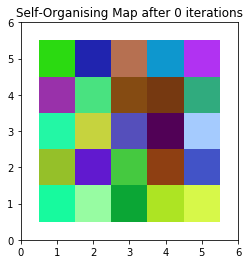

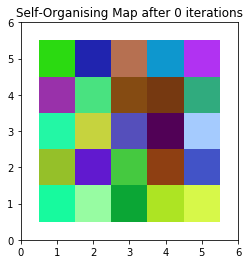

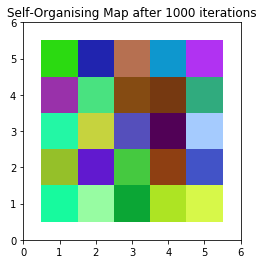

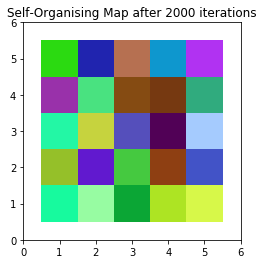

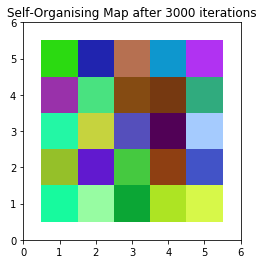

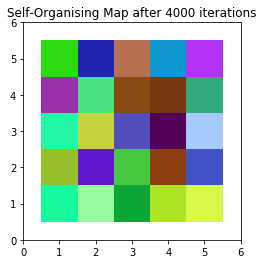

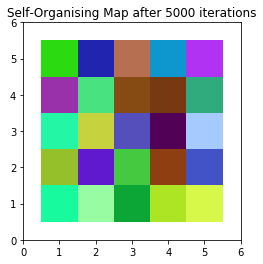

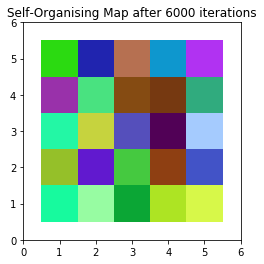

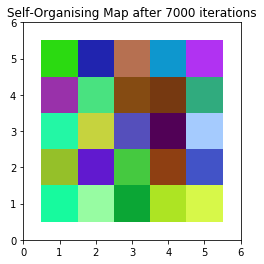

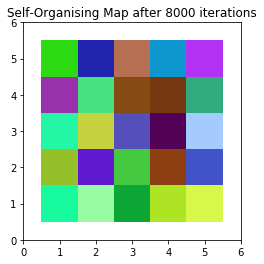

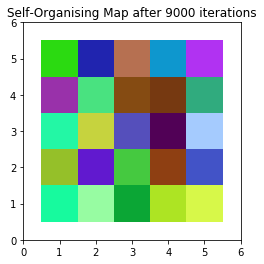

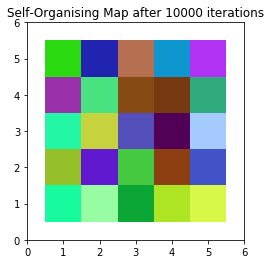

In [13]:
if __name__ == '__main__':
    main()